In [4]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import pandas as pd

In [6]:
IMAGE_SIZE=(224,224,3)

In [7]:
train_data="/content/data/data/train"
val_data="/content/data/data/val"
test_data="/content/data/data/test"


In [8]:
labels = ['Coccidiosis', 'Salmonella', 'New Castle Disease', 'Healthy']
train_data="/content/data/data/train"

In [9]:
import os
import cv2

labels = ['Coccidiosis', 'Salmonella', 'New Castle Disease', 'Healthy']
train_data = r"C:\Jupyter\data\data\train"

def read_data(folder):
    data, label, paths = [], [], []
    for l in labels:
        path = os.path.join(folder, l)
        if not os.path.exists(path):
            print(f"⚠️ Skipping missing folder: {path}")
            continue
        image_files = os.listdir(path)[:500]
        for image_file in image_files:
            img_path = os.path.join(path, image_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                data.append(img)
                label.append(l)
                paths.append(img_path)
            else:
                print(f"❌ Cannot read: {img_path}")
    return data, label, paths
all_data, all_labels, all_paths = read_data(train_data)


In [10]:
train_df=pd.DataFrame({
    'image':all_data,
    'path':all_paths,
    'label':all_labels
})

In [11]:
train_df

,image,path,label
0,"[[[217, 212, 211], [221, 216, 215], [225, 218,...",C:\Jupyter\data\data\train\Coccidiosis\cocci.0...,Coccidiosis
1,"[[[200, 180, 199], [173, 161, 181], [83, 83, 1...",C:\Jupyter\data\data\train\Coccidiosis\cocci.0...,Coccidiosis
2,"[[[78, 145, 130], [78, 144, 133], [79, 145, 14...",C:\Jupyter\data\data\train\Coccidiosis\cocci.0...,Coccidiosis
3,"[[[11, 40, 44], [173, 204, 207], [197, 229, 23...",C:\Jupyter\data\data\train\Coccidiosis\cocci.0...,Coccidiosis
4,"[[[192, 191, 200], [190, 192, 200], [206, 212,...",C:\Jupyter\data\data\train\Coccidiosis\cocci.0...,Coccidiosis
...,...,...,...
1995,"[[[123, 143, 138], [129, 149, 144], [132, 149,...",C:\Jupyter\data\data\train\Healthy\healthy.100...,Healthy
1996,"[[[92, 94, 95], [92, 94, 95], [92, 94, 95], [9...",C:\Jupyter\data\data\train\Healthy\healthy.100...,Healthy
1997,"[[[7, 124, 205], [7, 124, 205], [7, 124, 205],...",C:\Jupyter\data\data\train\Healthy\healthy.100...,Healthy
1998,"[[[154, 154, 154], [154, 154, 154], [154, 154,...",C:\Jupyter\data\data\train\Healthy\healthy.100...,Healthy


In [12]:
import os
import cv2

labels = ['Coccidiosis', 'Salmonella', 'New Castle Disease', 'Healthy']
test_data = r"C:\Jupyter\data\data\test"

def read_data(folder):
    data, label, paths = [], [], []
    for l in labels:
        path = os.path.join(folder, l)
        if not os.path.exists(path):
            print(f"⚠️ Skipping missing folder: {path}")
            continue
        image_files = os.listdir(path)[:500]
        for image_file in image_files:
            img_path = os.path.join(path, image_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                data.append(img)
                label.append(l)
                paths.append(img_path)
            else:
                print(f"❌ Cannot read: {img_path}")
    return data, label, paths
all_data, all_labels, all_paths = read_data(test_data)


In [13]:
test_df=pd.DataFrame({
    'image':all_data,
    'path':all_paths,
    'label':all_labels
})

In [14]:
test_df

,image,path,label
0,"[[[82, 146, 147], [80, 144, 145], [77, 140, 14...",C:\Jupyter\data\data\test\Coccidiosis\cocci.0....,Coccidiosis
1,"[[[192, 195, 199], [193, 196, 200], [200, 203,...",C:\Jupyter\data\data\test\Coccidiosis\cocci.0....,Coccidiosis
2,"[[[139, 157, 158], [139, 157, 158], [139, 157,...",C:\Jupyter\data\data\test\Coccidiosis\cocci.0....,Coccidiosis
3,"[[[203, 191, 185], [204, 196, 189], [196, 193,...",C:\Jupyter\data\data\test\Coccidiosis\cocci.0....,Coccidiosis
4,"[[[95, 137, 144], [93, 132, 140], [100, 132, 1...",C:\Jupyter\data\data\test\Coccidiosis\cocci.0....,Coccidiosis
...,...,...,...
1995,"[[[239, 235, 230], [239, 235, 230], [239, 235,...",C:\Jupyter\data\data\test\Healthy\healthy.1055...,Healthy
1996,"[[[216, 13, 216], [216, 14, 215], [217, 14, 21...",C:\Jupyter\data\data\test\Healthy\healthy.1055...,Healthy
1997,"[[[178, 170, 157], [177, 169, 156], [172, 163,...",C:\Jupyter\data\data\test\Healthy\healthy.1055...,Healthy
1998,"[[[145, 144, 140], [145, 144, 140], [145, 143,...",C:\Jupyter\data\data\test\Healthy\healthy.1055...,Healthy


In [16]:
import os
import cv2

labels = ['Coccidiosis', 'Salmonella', 'New Castle Disease', 'Healthy']
val_data = r"C:\Jupyter\data\data\val"

def read_data(folder):
    data, label, paths = [], [], []
    for l in labels:
        path = os.path.join(folder, l)
        if not os.path.exists(path):
            print(f"⚠️ Skipping missing folder: {path}")
            continue
        image_files = os.listdir(path)[:500]
        for image_file in image_files:
            img_path = os.path.join(path, image_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))
                data.append(img)
                label.append(l)
                paths.append(img_path)
            else:
                print(f"❌ Cannot read: {img_path}")
    return data, label, paths
all_data, all_labels, all_paths = read_data(val_data)


In [17]:
val_df=pd.DataFrame({
    'image':all_data,
    'path':all_paths,
    'label':all_labels
})

In [18]:
val_df

,image,path,label
0,"[[[65, 64, 73], [178, 180, 188], [117, 123, 12...",C:\Jupyter\data\data\val\Coccidiosis\cocci.0.j...,Coccidiosis
1,"[[[194, 173, 188], [203, 177, 193], [217, 183,...",C:\Jupyter\data\data\val\Coccidiosis\cocci.0.j...,Coccidiosis
2,"[[[153, 152, 161], [142, 139, 148], [192, 181,...",C:\Jupyter\data\data\val\Coccidiosis\cocci.0.j...,Coccidiosis
3,"[[[148, 15, 55], [114, 0, 9], [159, 6, 29], [1...",C:\Jupyter\data\data\val\Coccidiosis\cocci.0.j...,Coccidiosis
4,"[[[122, 126, 127], [124, 126, 127], [127, 127,...",C:\Jupyter\data\data\val\Coccidiosis\cocci.0.j...,Coccidiosis
...,...,...,...
1995,"[[[100, 103, 101], [99, 102, 100], [98, 101, 9...",C:\Jupyter\data\data\val\Healthy\healthy.11.jp...,Healthy
1996,"[[[2, 5, 9], [20, 23, 31], [21, 25, 43], [14, ...",C:\Jupyter\data\data\val\Healthy\healthy.11.jp...,Healthy
1997,"[[[13, 21, 58], [13, 20, 59], [6, 12, 53], [9,...",C:\Jupyter\data\data\val\Healthy\healthy.11.jp...,Healthy
1998,"[[[166, 144, 138], [169, 147, 141], [162, 143,...",C:\Jupyter\data\data\val\Healthy\healthy.110.j...,Healthy


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
gen = ImageDataGenerator()


In [21]:
train_gen = gen.flow_from_dataframe(
    train_df, 
    x_col='path', 
    y_col='label', 
    target_size=(224, 224), 
    seed=123, 
    class_mode='categorical', 
    color_mode='rgb', 
    shuffle=True, 
    batch_size=32
)

Found 2000 validated image filenames belonging to 4 classes.


In [22]:
gen = ImageDataGenerator()

In [23]:
test_gen = gen.flow_from_dataframe(
    test_df, 
    x_col='path', 
    y_col='label', 
    target_size=(224, 224), 
    seed=123, 
    class_mode='categorical', 
    color_mode='rgb', 
    shuffle=True, 
    batch_size=32
)

Found 2000 validated image filenames belonging to 4 classes.


In [24]:
gen = ImageDataGenerator()

In [25]:
val_gen = gen.flow_from_dataframe(
    val_df, 
    x_col='path', 
    y_col='label', 
    target_size=(224, 224), 
    seed=123, 
    class_mode='categorical', 
    color_mode='rgb', 
    shuffle=True, 
    batch_size=32
)

Found 2000 validated image filenames belonging to 4 classes.


In [26]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16


In [27]:
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [28]:
for layer in vgg.layers:
    layer.trainable = False

In [29]:
x = vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  


In [30]:
model = Model(inputs=vgg.input, outputs=predictions)

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)


In [33]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,80

 Total params: 15,772,996 (60.17 MB)

 Trainable params: 1,055,236 (4.03 MB)

 Non-trainable params: 14,717,760 (56.14 MB)

In [34]:
from tensorflow.keras.optimizers.legacy import Adam


In [35]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
r = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stopping,reduce_lr]
)

c:\Users\yamin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5812 - loss: 1.3470

KeyboardInterrupt: 

In [38]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model


In [39]:
vgg1 = VGG19(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [40]:
for layer in vgg1.layers:
    layer.trainable = False

In [41]:
x = Flatten()(vgg1.output)
prediction = Dense(4, activation='softmax')(x)  

In [42]:
model1 = Model(inputs=vgg1.input, outputs=prediction)

In [43]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [44]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model


In [45]:
res = ResNet50(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

In [46]:
for layer in res.layers:
    layer.trainable = False

In [47]:
x = Flatten()(res.output)
prediction = Dense(4, activation='softmax')(x) 

In [48]:
model2 = Model(inputs=res.input, outputs=prediction)

In [49]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [55]:
r = model2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 325s 5s/step - accuracy: 0.6422 - loss: 5.1678 - val_accuracy: 0.6670 - val_loss: 9.4388
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 299s 5s/step - accuracy: 0.9302 - loss: 0.9691 - val_accuracy: 0.6855 - val_loss: 8.7275
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 304s 5s/step - accuracy: 0.9741 - loss: 0.2304 - val_accuracy: 0.6695 - val_loss: 9.7579
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 337s 5s/step - accuracy: 0.9753 - loss: 0.2451 - val_accuracy: 0.6775 - val_loss: 10.2366
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 0.9876 - loss: 0.1477 - val_accuracy: 0.6880 - val_loss: 10.2826


In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [51]:
def predictor(model, test_gen):
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)

    preds = model.predict(test_gen, verbose=1)
    errors = 0
    pred_indices = []
    test_count = len(preds)

    for i, p in enumerate(preds):
        pred_index = np.argmax(p)
        pred_indices.append(pred_index)
        true_index = test_gen.labels[i]
        if pred_index != true_index:
            errors += 1

    accuracy = (test_count - errors) * 100 / test_count
    ytrue = np.array(test_gen.labels, dtype='int')
    ypred = np.array(pred_indices, dtype='int')

    msg = f'There were {errors} errors in {test_count} tests for an accuracy of {accuracy:6.2f}'
    print(msg)

 
    cm = confusion_matrix(ytrue, ypred)
    plt.figure(figsize=(20, 20))
    sns.heatmap(cm, annot=True, vmin=0, fmt='d', cmap='Blues', cbar=False)
    plt.xticks(np.arange(class_count)+0.5, classes, rotation=90)
    plt.yticks(np.arange(class_count)+0.5, classes, rotation=0)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    clr = classification_report(ytrue, ypred, target_names=classes, digits=4)
    print("Classification Report:\n----------------------\n")

C:\Users\yamin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 405s 6s/step
There were 1503 errors in 2000 tests for an accuracy of  24.85


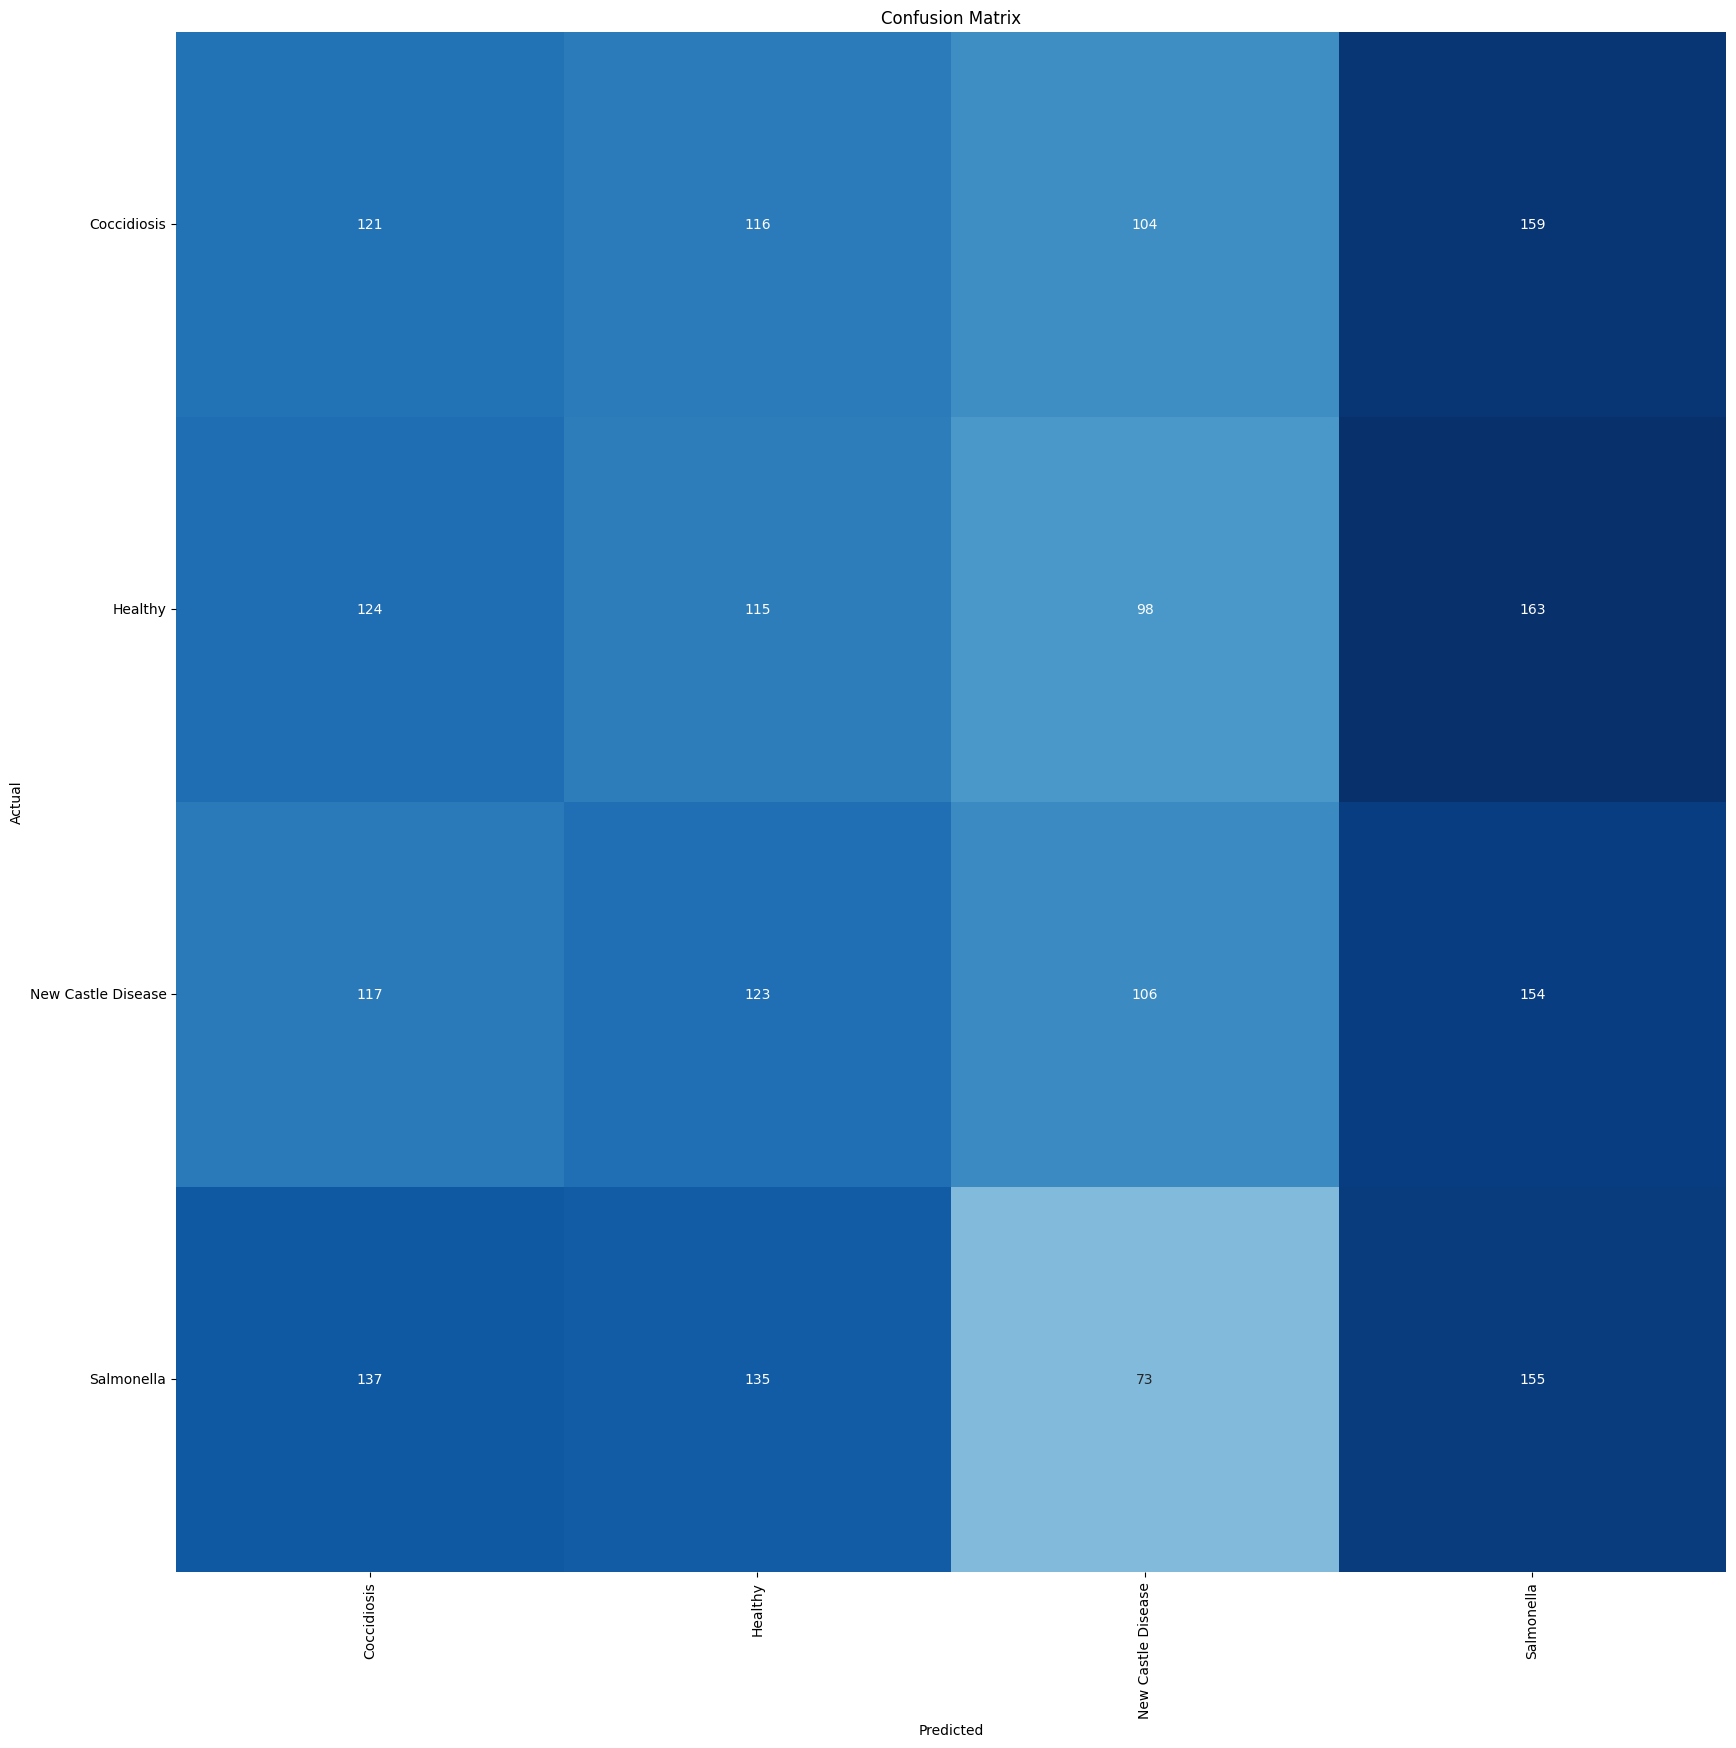

Classification Report:
----------------------



In [58]:
predictor(model,test_gen)

In [52]:
from keras.layers import GlobalAveragePooling2D

In [53]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [54]:
import keras_tuner as kt

In [2]:
def build_model(hp):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(
        hp.Int('units', min_value=512, max_value=2048, step=512),
        activation='relu'
    )(x)
    predictions = Dense(4, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False


    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG', default=1e-3)
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)


stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


tuner.search(train_gen, epochs=5, validation_data=val_gen, callbacks=[stop_early])


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The optimal number of units in the dense layer is {best_hps.get('units')} 
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

model = tuner.hypermodel.build(best_hps)

history = model.fit(train_gen, validation_data=val_gen, epochs=10)

NameError: name 'ResNet50' is not defined

In [55]:
train_gen.class_indices.keys()

dict_keys(['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella'])

In [56]:
labels = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']

In [57]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [58]:
def get_model_prediction(image_path):
    img = load_img(image_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x, verbose=0)
    return labels[predictions.argmax()]

In [74]:
get_model_prediction('data/data/test/Coccidiosis/cocci.0.jpg_aug16.JPG')  



'Coccidiosis'

In [68]:
get_model_prediction('data/data/test/Healthy/healthy.1003.jpg_aug47.JPG')

'Healthy'

In [75]:
get_model_prediction('data/data/test/New Castle Disease/ncd.1.jpg_aug197.JPG')

'New Castle Disease'

In [84]:
get_model_prediction('data/data/test/Salmonella/pcrsalmo.1.jpg_aug7.JPG')

'Coccidiosis'

In [81]:
get_model_prediction('data/data/test/Salmonella/pcrsalmo.115.jpg_aug28.JPG')

'Salmonella'

In [85]:
model.save("model.h5")
